uautorec (k=32) - Train loss history shape: (170,)
uautorec (k=32) - Test RMSE history shape: (170,)
uautorec1conf (k=32) - Train loss history shape: (170,)
uautorec1conf (k=32) - Test RMSE history shape: (170,)
uautorec1confexp (k=32) - Train loss history shape: (170,)
uautorec1confexp (k=32) - Test RMSE history shape: (170,)
uautorec2confexp (k=32) - Train loss history shape: (170,)
uautorec2confexp (k=32) - Test RMSE history shape: (170,)
uautorec3conf (k=32) - Train loss history shape: (170,)
uautorec3conf (k=32) - Test RMSE history shape: (170,)
uautorec3confexp (k=32) - Train loss history shape: (170,)
uautorec3confexp (k=32) - Test RMSE history shape: (170,)


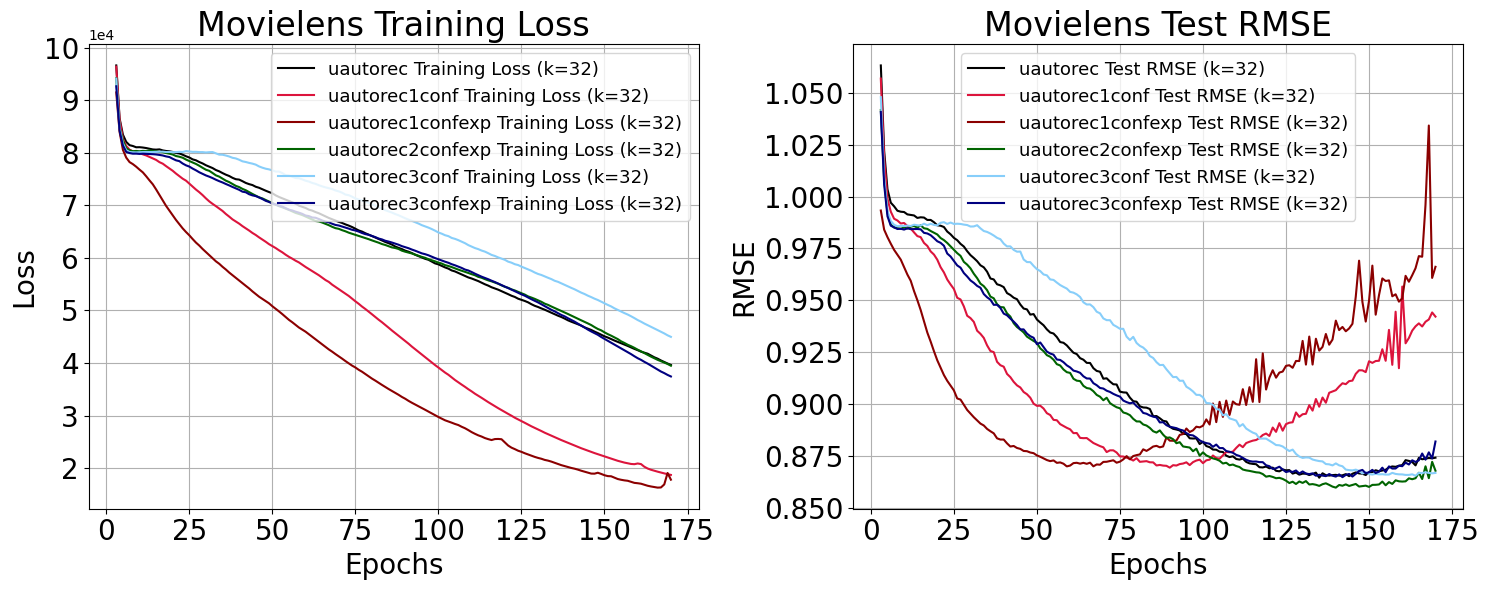

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_results(result_path, models, k_values, contype, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note = '', epoch =10):
    epoch = 170

    # Define a color map for the models
    color_map = {
        'uautorec': 'black',
        'uautorec1conf': 'crimson',
        'uautorec1confexp': 'darkred',
        'uautorec2conf': 'limegreen',
        'uautorec2confexp': 'darkgreen',
        'uautorec3conf': 'lightskyblue',
        'uautorec3confexp': 'navy',
        'uautorec4conf': 'gold',
        'uautorec4confexp': 'orange'
    }

    for c in contype:
        for k in k_values:
            plt.figure(figsize=(15, 6))

            for model in models:
                class_name = model['class_name'].lower()
                class_folder = os.path.join(result_path, class_name)

                train_loss_file = os.path.join(class_folder, f'{epoch}_train_loss_ml_k{k}.npy')
                test_rmse_file = os.path.join(class_folder, f'{epoch}_test_rmse_ml_k{k}.npy')

                # train_loss_file = os.path.join(class_folder, f'{epoch}_train_loss_ml_k{k}.npy')
                # test_rmse_file = os.path.join(class_folder, f'{epoch}_test_rmse_ml_k{k}.npy')

                if not os.path.exists(train_loss_file) or not os.path.exists(test_rmse_file):
                    print(f"Files for {class_name} with k={k} not found.")
                    continue

                train_loss_history = np.load(train_loss_file)
                test_rmse_history = np.load(test_rmse_file)

                print(f"{class_name} (k={k}) - Train loss history shape: {train_loss_history.shape}")
                print(f"{class_name} (k={k}) - Test RMSE history shape: {test_rmse_history.shape}")

                epochs = np.arange(1, len(train_loss_history) + 1)

                color = color_map.get(class_name, 'black')  # Default color if class_name not in color_map

                # Plot training loss
                plt.subplot(1, 2, 1)
                plt.plot(epochs[2:], train_loss_history[2:], label=f'{class_name} Training Loss (k={k})', color=color)
                
                # Plot test RMSE
                plt.subplot(1, 2, 2)
                plt.plot(epochs[2:], test_rmse_history[2:], label=f'{class_name} Test RMSE (k={k})', color=color)

            plt.subplot(1, 2, 1)
            plt.xlabel('Epochs', fontsize=20)
            plt.ylabel('Loss', fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.title('Movielens Training Loss', fontsize=24)
            plt.legend(fontsize=13)
            plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(4,4))
            plt.grid(True)

            plt.subplot(1, 2, 2)
            plt.xlabel('Epochs', fontsize=20)
            plt.ylabel('RMSE', fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.title('Movielens Test RMSE', fontsize=24)
            plt.legend(fontsize=13)
            plt.grid(True)

            plt.tight_layout()

            if save_plots:
                if not os.path.exists(plot_path):
                    os.makedirs(plot_path)
                
                # # Save the entire figure with both subplots
                # combined_plot_file = os.path.join(plot_path, f'{epoch}_plots_{note}_k{k}.png')
                # plt.savefig(combined_plot_file)
                # print(f"Combined plot saved to {combined_plot_file}")

                # Save training loss plot separately
                plt.figure(figsize=(10, 7))
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)
                    train_loss_file = os.path.join(class_folder, f'{epoch}_train_loss_ml_k{k}.npy')
                    if not os.path.exists(train_loss_file):
                        continue
                    train_loss_history = np.load(train_loss_file)
                    epochs = np.arange(1, len(train_loss_history) + 1)
                    color = color_map.get(class_name, 'black')
                    plt.plot(epochs[2:], train_loss_history[2:], label=f'{class_name} Training Loss (k={k})', color=color)
                plt.xlabel('Epochs', fontsize=20)
                plt.ylabel('Loss (x 1e4)', fontsize=20)
                plt.xticks(fontsize=20)
                plt.yticks(fontsize=20)
                plt.title('Movielens Training Loss', fontsize=24)
                plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(4,4))

                plt.legend(fontsize=13)
                plt.grid(True)
                loss_plot_file = os.path.join(plot_path, f'{epoch}_train_loss_{note}_k{k}.png')
                plt.savefig(loss_plot_file)
                print(f"Training loss plot saved to {loss_plot_file}")
                plt.close()

                # Save test RMSE plot separately
                plt.figure(figsize=(10, 7))
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)
                    test_rmse_file = os.path.join(class_folder, f'{epoch}_test_rmse_ml_k{k}.npy')
                    if not os.path.exists(test_rmse_file):
                        continue
                    test_rmse_history = np.load(test_rmse_file)
                    epochs = np.arange(1, len(test_rmse_history) + 1)
                    color = color_map.get(class_name, 'black')
                    plt.plot(epochs[130:], test_rmse_history[130:], label=f'{class_name} Test RMSE (k={k})', color=color)
                plt.xlabel('Epochs', fontsize=20)
                plt.ylabel('RMSE', fontsize=20)
                plt.xticks(fontsize=20)
                plt.yticks(fontsize=20)
                plt.title('Movielens Test RMSE', fontsize=24)
                plt.legend(fontsize=13)
                plt.grid(True)
                rmse_plot_file = os.path.join(plot_path, f'{epoch}_test_rmse_{note}_k{k}.png')
                plt.savefig(rmse_plot_file)
                print(f"Test RMSE plot saved to {rmse_plot_file}")
                plt.close()

            plt.show()


# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results'
models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1Conf'},
    {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1ConfExp'},
    # {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2Conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2ConfExp'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3Conf'},
    {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3ConfExp'},
    # {'module_name': 'urec_4_conf', 'class_name': 'UAutoRec4Conf'},
    # {'module_name': 'urec_4_confexp', 'class_name': 'UAutoRec4ConfExp'}
]
k_values = [32]  # Add all the k values you want to plot
contype = ['']

plot_results(result_path, models,  k_values, contype, save_plots=False,  note = '', epoch = 170)
